In [1]:
from implicit_learning.utils import  *
from PIL import Image 
import matplotlib.pyplot as plt  
import seaborn as sns 

### Image and Gradient

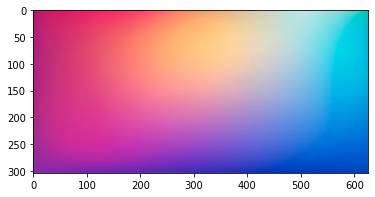

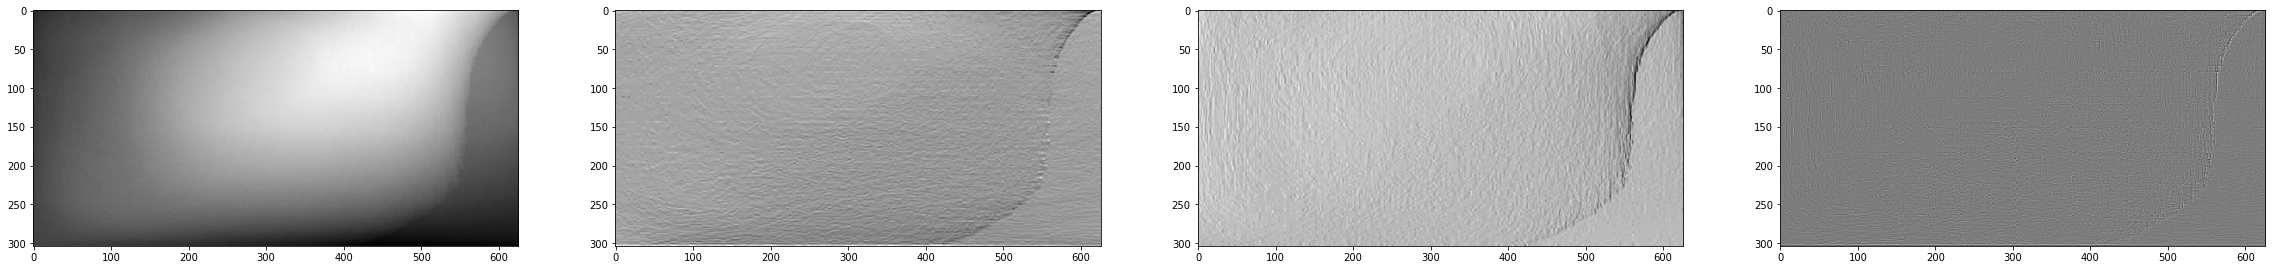

In [22]:
im = Image.open("../data/pastel.jpg")
data = np.array(im)

# Gray Scale 
gradient_x = compute_image_gradient(data.mean(axis=-1))[0]
gradient_y = compute_image_gradient(data.mean(axis=-1))[1]
divergence  = compute_image_divergence(data.mean(axis=-1))


plt.figure()
plt.imshow(data)
data = data
fig, ax = plt.subplots(1,4, figsize=(40,40))
ax[0].imshow(data.mean(axis=-1), cmap='gray')
ax[1].imshow(gradient_x, cmap='gray')
ax[2].imshow(gradient_y, cmap='gray')
ax[3].imshow(divergence, cmap='gray')


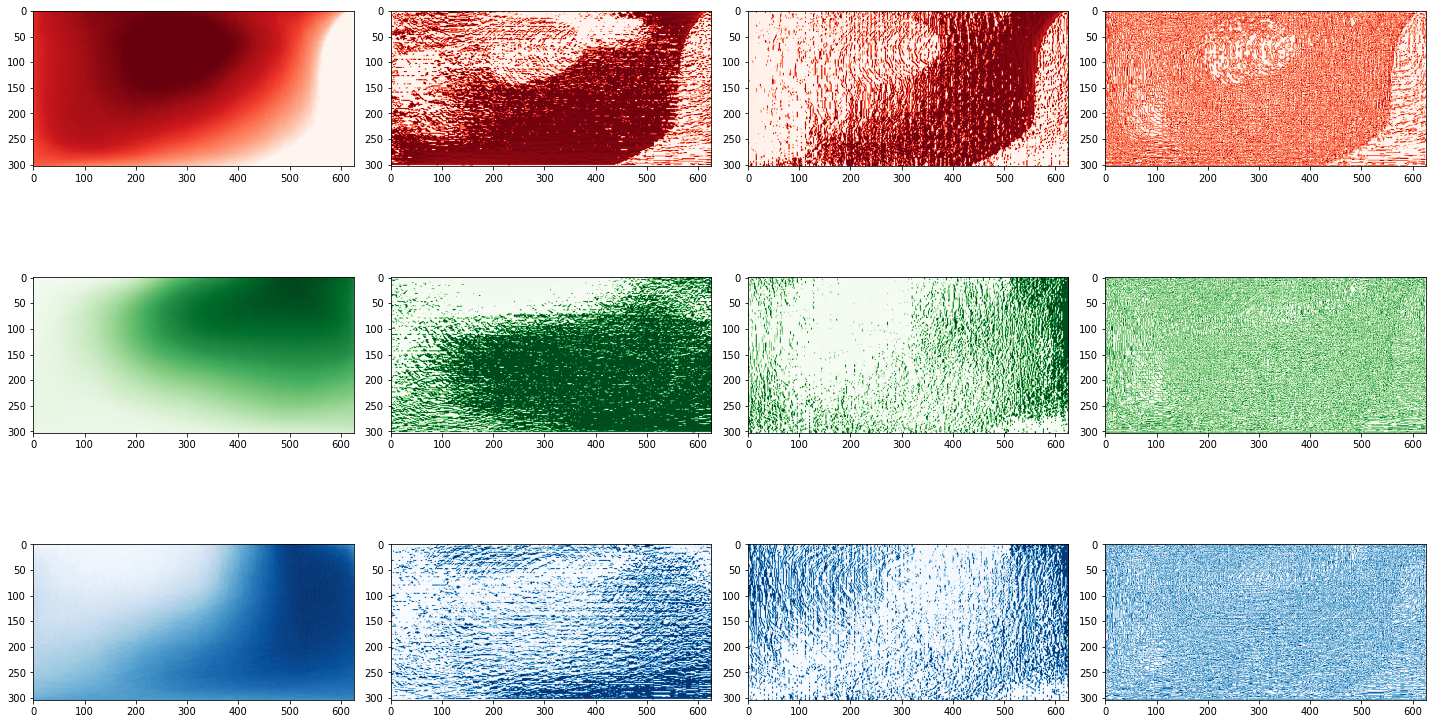

In [23]:
# RGB scale

grad_r = compute_image_gradient(data[:,:,0])
grad_g = compute_image_gradient(data[:,:,1])
grad_b = compute_image_gradient(data[:,:,2])

rgb_divergence = [compute_image_divergence(data[:,:,i]) for i in range(3)]

fig, ax = plt.subplots(3,4, figsize=(20,12))
colors = ['Reds','Greens', 'Blues']
grads = [grad_r, grad_g, grad_b]
for i in range(3):
    ax[i][0].imshow(data[:,:,i], cmap=colors[i])
    ax[i][1].imshow(grads[i][0], cmap=colors[i])
    ax[i][2].imshow(grads[i][1], cmap=colors[i])
    ax[i][3].imshow(rgb_divergence[i], cmap=colors[i])
plt.tight_layout()

# Histogram

Text(0.5, 1.0, 'divergence')

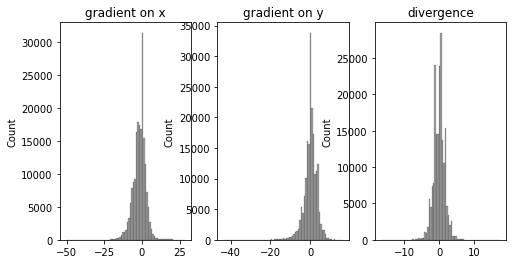

In [24]:
fig, ax = plt.subplots(1,3, figsize=(8,4))
bins = 80
sns.histplot(gradient_x.flatten(), bins=bins, ax = ax[0], color="gray")
sns.histplot(gradient_y.flatten(), bins=bins, ax = ax[1], color="gray")
sns.histplot(divergence.flatten(), bins=bins, ax = ax[2], color="gray")
ax[0].set_title("gradient on x")
ax[1].set_title("gradient on y")
ax[2].set_title("divergence")

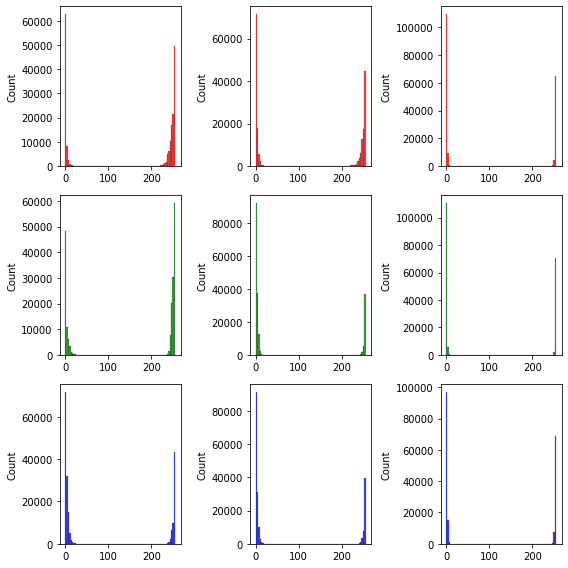

In [25]:
fig, ax = plt.subplots(3,3, figsize=(8,8))
sns.histplot(grad_r[0].flatten(), bins=bins, ax = ax[0,0], color="red")
sns.histplot(grad_g[0].flatten(), bins=bins, ax = ax[1,0], color="green")
sns.histplot(grad_b[0].flatten(), bins=bins, ax = ax[2,0], color="blue")

sns.histplot(grad_r[1].flatten(), bins=bins, ax = ax[0,1], color="red")
sns.histplot(grad_g[1].flatten(), bins=bins, ax = ax[1,1], color="green")
sns.histplot(grad_b[1].flatten(), bins=bins, ax = ax[2,1], color="blue")

sns.histplot(rgb_divergence[0].flatten(), bins=bins, ax = ax[0,2], color="red")
sns.histplot(rgb_divergence[1].flatten(), bins=bins, ax = ax[1,2], color="green")
sns.histplot(rgb_divergence[2].flatten(), bins=bins, ax = ax[2,2], color="blue")

plt.tight_layout()